# Explore here

In [37]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from dotenv import load_dotenv

# load the .env file variables
load_dotenv(override=True) #only works with override 



True

In [38]:
#.env ids
client_id = os.getenv('CLIENT_ID')
client_secret = os.getenv('CLIENT_SECRET')

In [39]:
#initialize spotipy
spotify = spotipy.Spotify(client_credentials_manager = SpotifyClientCredentials(client_id, client_secret))

In [40]:
#search for the big brother

big_brother = 'spotify:artist:4J69yWrKwWJgjv3DKTZcGo'

results = spotify.artist_top_tracks(big_brother, country='US')

results

{'tracks': [{'album': {'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4J69yWrKwWJgjv3DKTZcGo'},
      'href': 'https://api.spotify.com/v1/artists/4J69yWrKwWJgjv3DKTZcGo',
      'id': '4J69yWrKwWJgjv3DKTZcGo',
      'name': 'Big Brother & The Holding Company',
      'type': 'artist',
      'uri': 'spotify:artist:4J69yWrKwWJgjv3DKTZcGo'},
     {'external_urls': {'spotify': 'https://open.spotify.com/artist/4NgfOZCL9Ml67xzM0xzIvC'},
      'href': 'https://api.spotify.com/v1/artists/4NgfOZCL9Ml67xzM0xzIvC',
      'id': '4NgfOZCL9Ml67xzM0xzIvC',
      'name': 'Janis Joplin',
      'type': 'artist',
      'uri': 'spotify:artist:4NgfOZCL9Ml67xzM0xzIvC'}],
    'available_markets': ['AR',
     'AU',
     'AT',
     'BE',
     'BO',
     'BR',
     'BG',
     'CA',
     'CL',
     'CO',
     'CR',
     'CY',
     'CZ',
     'DK',
     'DO',
     'DE',
     'EC',
     'EE',
     'SV',
     'FI',
     'FR',
     'GR',
     'GT',
     'HN',
    

In [41]:
#let's make a data frame
tracks = []
for track in results["tracks"]:
    tracks.append({
        "name": track["name"],
        "album": track["album"]["name"],
        "artist": ", ".join([i["name"] for i in track["artists"]]),
        "popularity": track["popularity"],
        "duration_ms": track["duration_ms"],
        "id": track["id"]
    })

df = pd.DataFrame(tracks)
df.head()

,name,album,artist,popularity,duration_ms,id
0,Piece of My Heart,Cheap Thrills,"Big Brother & The Holding Company, Janis Joplin",66,253333,1xKQbqQtQWrtQS47fUJBtl
1,Summertime,Cheap Thrills,"Big Brother & The Holding Company, Janis Joplin",57,238400,3eYCJXTViFwl5mdtcTsF4G
2,Call On Me,Big Brother & The Holding Company,"Big Brother & The Holding Company, Janis Joplin",50,152733,4HljoGSCvaFsesUZWpb2mK
3,Ball and Chain,Cheap Thrills,"Big Brother & The Holding Company, Janis Joplin",46,567973,6jXzkgISP6UfMEEaKkxWJw
4,I Need a Man to Love,Cheap Thrills,"Big Brother & The Holding Company, Janis Joplin",46,293040,5Z27tZEeC8WBiQvoDpx1Sw


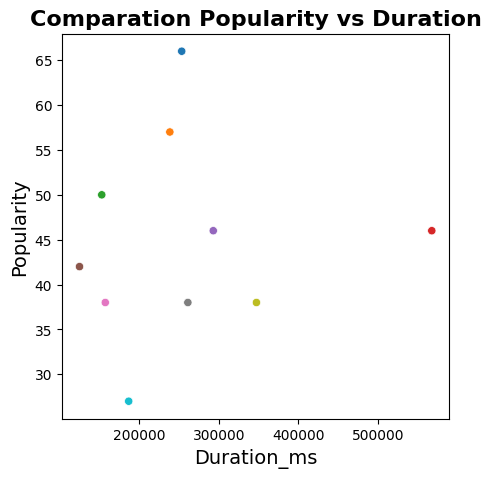

In [42]:
#scatter comparing duration and popularity

y = df['popularity']
x = df['duration_ms']

plt.figure(figsize=(5,5))
sns.scatterplot(data = df, x= x, y= y, hue=df['name'], legend= False)
plt.title('Comparation Popularity vs Duration', fontsize = 16, fontweight = 'bold')
plt.ylabel('Popularity', fontsize = 14)
plt.xlabel('Duration_ms', fontsize = 14)
plt.show()

In [ ]:
#explore new variables

track_ids = df['id'].tolist()
features = spotify.audio_features(tracks=track_ids)



'''
for i in track_ids:
    features.append(spotify.audio_features(i))
'''
features_df = pd.DataFrame(features)




HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=1xKQbqQtQWrtQS47fUJBtl with Params: {} returned 403 due to None


SpotifyException: http status: 403, code:-1 - https://api.spotify.com/v1/audio-features/?ids=1xKQbqQtQWrtQS47fUJBtl:
 None, reason: None